# 주식 자산 평가

## 주식 평가
* 1. 소유 주식 종가 정보 가져온다.
* 2. 전고점 대비 현재 종가의 변동 비율을 구한다.
* 3. 시각화한다.

In [1]:
import FinanceDataReader as fdr
import pandas as pd
from tqdm import tqdm

## 여러 종목 불러와 df 만들기

In [2]:
# AAPL : apple
# MSFT : microsoft
# TSLA : tesla
# NVDA : nvidia
# IVV : iShares Core S&P 500 ETF
# SPYG : SPDR® Portfolio S&P 500 Growth ETF
# VYM : Vanguard High Dividend Yield Index Fund ETF Shares

# 셀트리온 : '068270'
# 삼성전자 : '005930'
# 인선이엔티 : '060150'
# 스튜디오드래곤 : '253450'
# KT : '030200'

### 해외 주식

In [3]:
us_stock_dic = {'AAPL' : 'apple', 'MSFT' : 'microsoft', 'TSLA' : 'tesla', 'NVDA' : 'nvidia',
'IVV' : 'IVV', 'SPYG' : 'SPYG', 'VYM' : 'VYM'}

In [4]:
us_stock_df = pd.DataFrame()
for code in tqdm( us_stock_dic.keys() ):
    name = us_stock_dic[code]
    tmp = fdr.DataReader(code, '2021-11')
    tmp = tmp.rename(columns={'Close':name})
    us_stock_df = pd.concat([us_stock_df, tmp[name]], axis=1)
us_stock_df

100%|██████████| 7/7 [00:09<00:00,  1.35s/it]


,apple,microsoft,tesla,nvidia,IVV,SPYG,VYM
2021-11-01 00:00:00,148.96,329.37,1208.59,258.27,461.94,69.79,108.92
2021-11-02 00:00:00,150.02,333.13,1172.00,264.01,463.76,70.12,109.38
2021-11-03 00:00:00,151.49,334.00,1213.86,265.98,466.61,70.65,109.99
2021-11-04 00:00:00,150.96,336.44,1229.91,298.01,468.75,71.50,109.67
2021-11-05 00:00:00,151.28,336.06,1222.09,297.52,470.40,71.50,110.34
2021-11-08 00:00:00,150.44,336.99,1162.94,308.04,470.89,71.52,110.33
2021-11-09 00:00:00,150.81,335.95,1023.50,306.57,469.25,71.17,110.25
2021-11-10 00:00:00,147.92,330.80,1067.95,294.59,465.54,70.26,110.23
2021-11-11 00:00:00,147.87,332.43,1063.51,303.90,465.73,70.42,110.35
2021-11-12 00:00:00,149.99,336.72,1033.42,303.90,469.16,71.23,110.52


In [5]:
us_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 2021-11-01 00:00:00 to 2021-12-27 00:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   apple      39 non-null     float64
 1   microsoft  39 non-null     float64
 2   tesla      39 non-null     float64
 3   nvidia     39 non-null     float64
 4   IVV        39 non-null     float64
 5   SPYG       39 non-null     float64
 6   VYM        39 non-null     float64
dtypes: float64(7)
memory usage: 2.4+ KB


In [6]:
us_stock_df = us_stock_df.reset_index()
us_stock_df['index'] = us_stock_df['index'].astype(str)
us_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      39 non-null     object 
 1   apple      39 non-null     float64
 2   microsoft  39 non-null     float64
 3   tesla      39 non-null     float64
 4   nvidia     39 non-null     float64
 5   IVV        39 non-null     float64
 6   SPYG       39 non-null     float64
 7   VYM        39 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.6+ KB


### 국내 주식

In [7]:
kr_stock_dic = {'068270':'셀트리온', '005930':'삼성전자', '060150':'인선이엔티', '253450':'스튜디오드래곤', '030200':'KT'}

In [8]:
kr_stock_df = pd.DataFrame()
for code in tqdm( kr_stock_dic.keys() ):
    name = kr_stock_dic[code]
    tmp = fdr.DataReader(code, '2021-11')
    tmp = tmp.rename(columns={'Close':name})
    kr_stock_df = pd.concat([kr_stock_df, tmp[name]], axis=1)
kr_stock_df

100%|██████████| 5/5 [00:01<00:00,  4.19it/s]


,셀트리온,삼성전자,인선이엔티,스튜디오드래곤,KT
2021-11-01 00:00:00,205500,69900,12200,87500,30850
2021-11-02 00:00:00,206500,71500,12200,88400,31150
2021-11-03 00:00:00,210000,70400,12100,87200,30500
2021-11-04 00:00:00,208500,70600,11900,86100,30700
2021-11-05 00:00:00,209000,70200,11750,88300,30450
2021-11-08 00:00:00,197000,70600,11950,89200,30600
2021-11-09 00:00:00,205500,70500,11800,88700,30950
2021-11-10 00:00:00,214000,70200,11250,87000,31000
2021-11-11 00:00:00,212500,69900,11350,87000,30700
2021-11-12 00:00:00,213500,70600,11650,89200,31550


In [9]:
kr_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 2021-11-01 00:00:00 to 2021-12-28 00:00:00
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   셀트리온     42 non-null     int64
 1   삼성전자     42 non-null     int64
 2   인선이엔티    42 non-null     int64
 3   스튜디오드래곤  42 non-null     int64
 4   KT       42 non-null     int64
dtypes: int64(5)
memory usage: 2.0+ KB


In [10]:
kr_stock_df = kr_stock_df.reset_index()
kr_stock_df.head()

,index,셀트리온,삼성전자,인선이엔티,스튜디오드래곤,KT
0,2021-11-01,205500,69900,12200,87500,30850
1,2021-11-02,206500,71500,12200,88400,31150
2,2021-11-03,210000,70400,12100,87200,30500
3,2021-11-04,208500,70600,11900,86100,30700
4,2021-11-05,209000,70200,11750,88300,30450


In [11]:
kr_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   index    42 non-null     datetime64[ns]
 1   셀트리온     42 non-null     int64         
 2   삼성전자     42 non-null     int64         
 3   인선이엔티    42 non-null     int64         
 4   스튜디오드래곤  42 non-null     int64         
 5   KT       42 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 2.1 KB


In [12]:
kr_stock_df['index'] = kr_stock_df['index'].astype(str)
kr_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    42 non-null     object
 1   셀트리온     42 non-null     int64 
 2   삼성전자     42 non-null     int64 
 3   인선이엔티    42 non-null     int64 
 4   스튜디오드래곤  42 non-null     int64 
 5   KT       42 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.1+ KB


In [13]:
kr_stock_df.head()

,index,셀트리온,삼성전자,인선이엔티,스튜디오드래곤,KT
0,2021-11-01,205500,69900,12200,87500,30850
1,2021-11-02,206500,71500,12200,88400,31150
2,2021-11-03,210000,70400,12100,87200,30500
3,2021-11-04,208500,70600,11900,86100,30700
4,2021-11-05,209000,70200,11750,88300,30450


## 시각화

In [14]:
import matplotlib.pyplot as plt

In [15]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [16]:
# 음수 표현
plt.rcParams['axes.unicode_minus'] = False

### 해외 주식

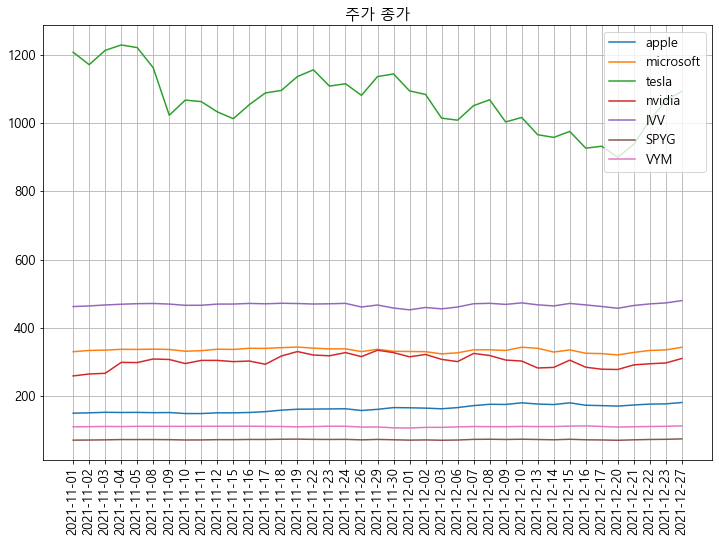

In [17]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=13)
plt.title('주가 종가', fontdict={'size':15})
for i in range(us_stock_df.shape[1]-1):
    plt.plot(us_stock_df['index'].values, us_stock_df.iloc[:,i+1], label=us_stock_df.columns[i+1])
plt.legend(fontsize=13)

### 국내 주식

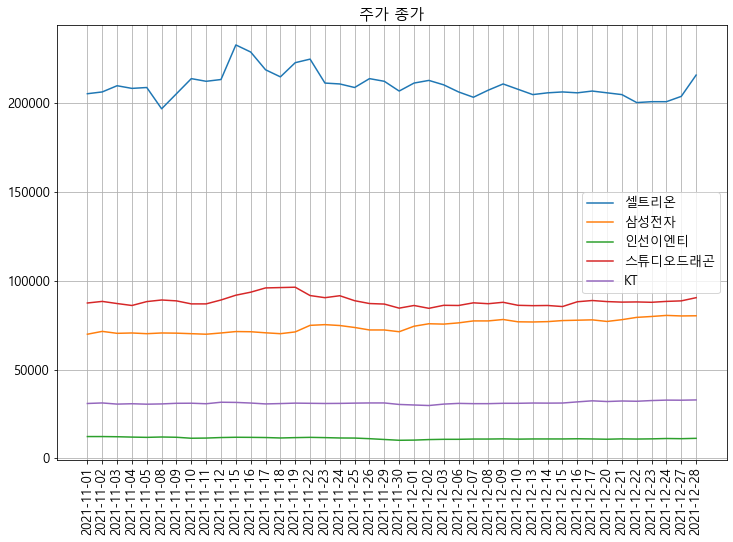

In [18]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=13)
plt.title('주가 종가', fontdict={'size':15})
for i in range(kr_stock_df.shape[1]-1):
    plt.plot(kr_stock_df['index'].values, kr_stock_df.iloc[:,i+1], label=kr_stock_df.columns[i+1])
plt.legend(fontsize=13)

## 전고점 대비 변화 비율 데이터 셋 만들기

### 해외 주식

In [19]:
us_stock_df.columns[1:]

Index(['apple', 'microsoft', 'tesla', 'nvidia', 'IVV', 'SPYG', 'VYM'], dtype='object')

In [20]:
for stock_name in us_stock_df.columns[1:]:
    top_close = us_stock_df[stock_name].max()
    col_name = stock_name + '_rate'
    us_stock_df[col_name] = ( (us_stock_df[stock_name] - top_close) / top_close ) * 100    

In [21]:
us_stock_df.head()

,index,apple,microsoft,tesla,nvidia,IVV,SPYG,VYM,apple_rate,microsoft_rate,tesla_rate,nvidia_rate,IVV_rate,SPYG_rate,VYM_rate
0,2021-11-01,148.96,329.37,1208.59,258.27,461.94,69.79,108.92,-17.395885,-4.004547,-1.733460,-22.618049,-3.642053,-5.021775,-2.497538
1,2021-11-02,150.02,333.13,1172.00,264.01,463.76,70.12,109.38,-16.808074,-2.908688,-4.708475,-20.898250,-3.262411,-4.572673,-2.085758
2,2021-11-03,151.49,334.00,1213.86,265.98,466.61,70.65,109.99,-15.992902,-2.655125,-1.304974,-20.308006,-2.667918,-3.851388,-1.539701
3,2021-11-04,150.96,336.44,1229.91,298.01,468.75,71.50,109.67,-16.286808,-1.943983,0.000000,-10.711290,-2.221527,-2.694611,-1.826157
4,2021-11-05,151.28,336.06,1222.09,297.52,470.40,71.50,110.34,-16.109355,-2.054735,-0.635819,-10.858102,-1.877347,-2.694611,-1.226390


In [22]:
us_stock_df.shape

(39, 15)

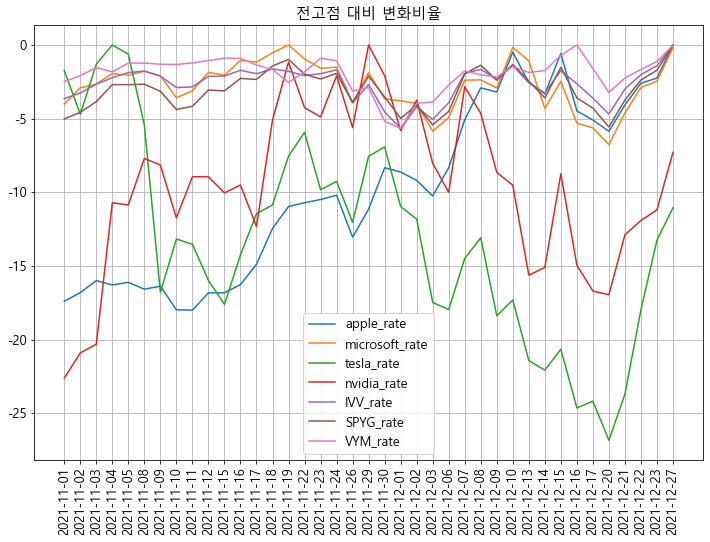

In [23]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=13)
plt.title('전고점 대비 변화비율', fontdict={'size':15})
for i in range(8,15):
    plt.plot(us_stock_df['index'].values, us_stock_df.iloc[:,i], label=us_stock_df.columns[i])
plt.legend(fontsize=13)

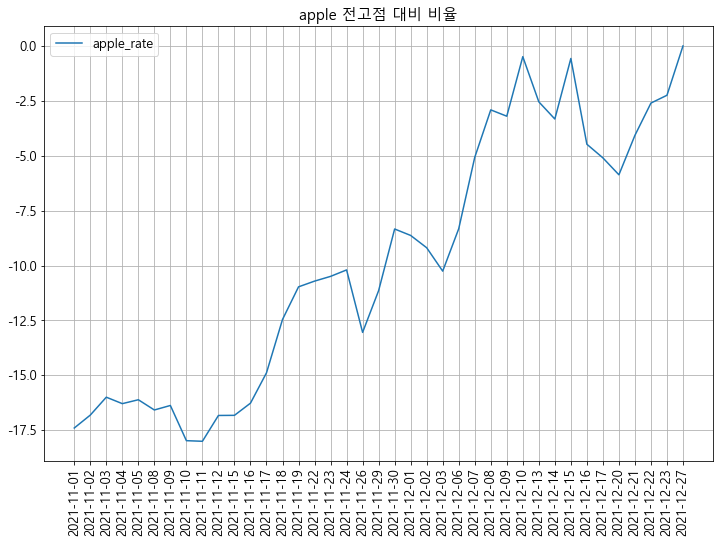

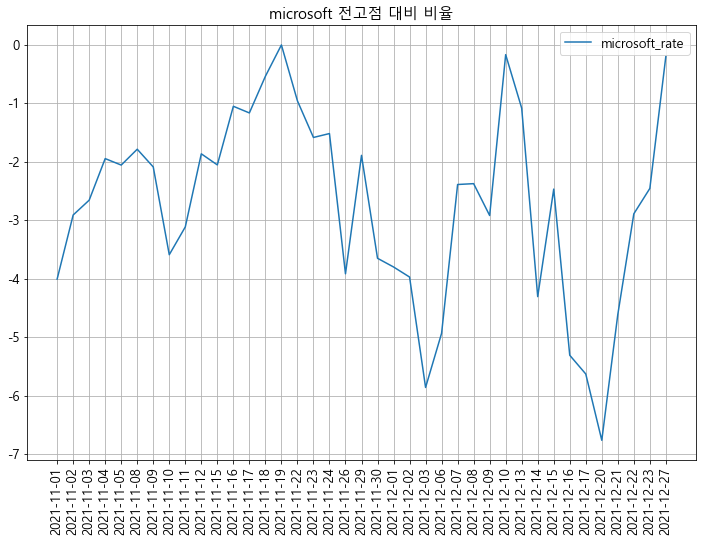

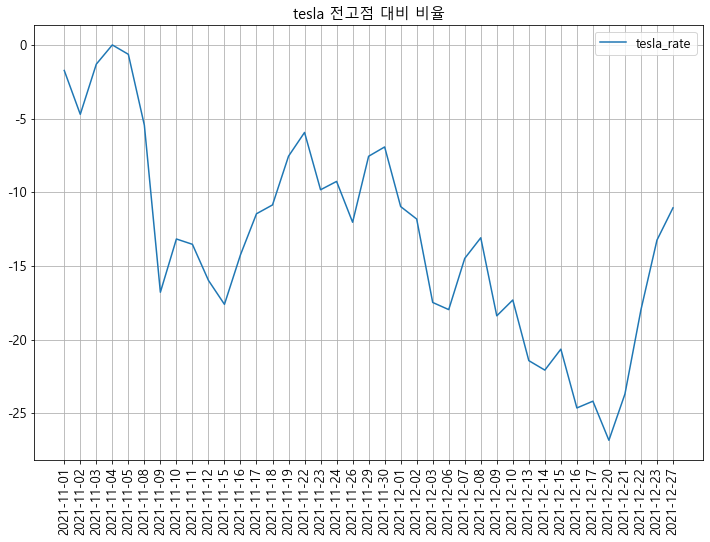

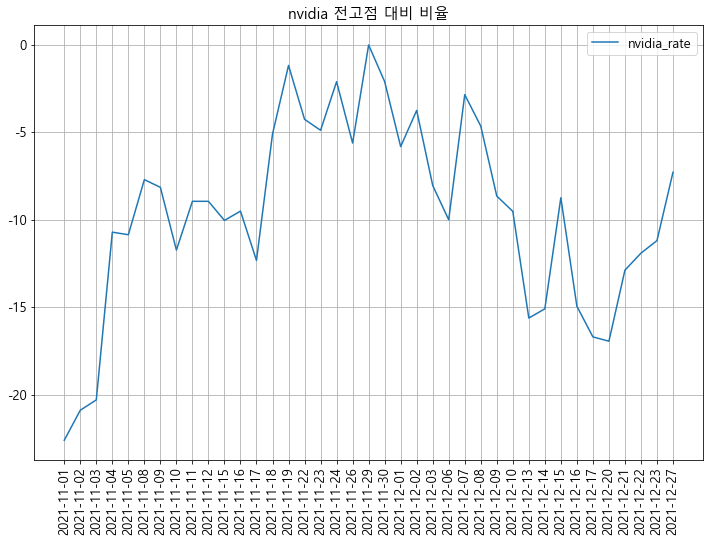

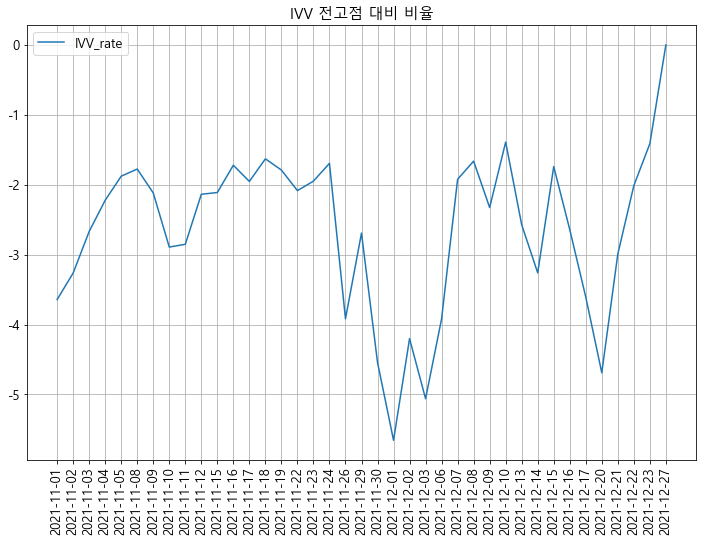

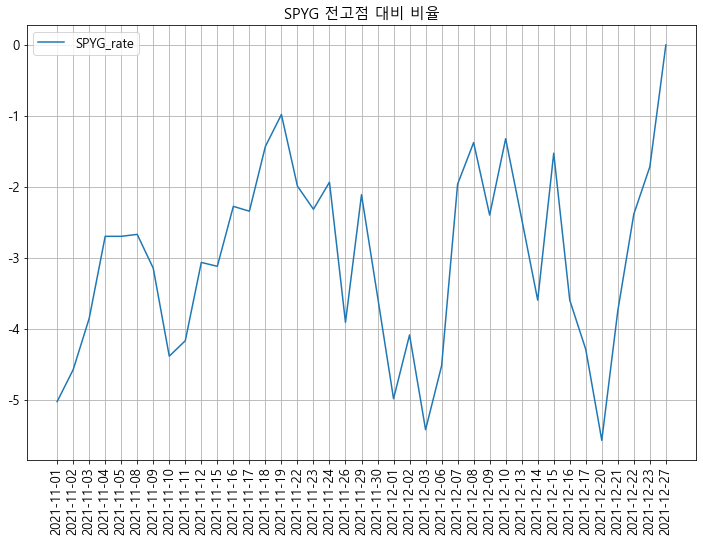

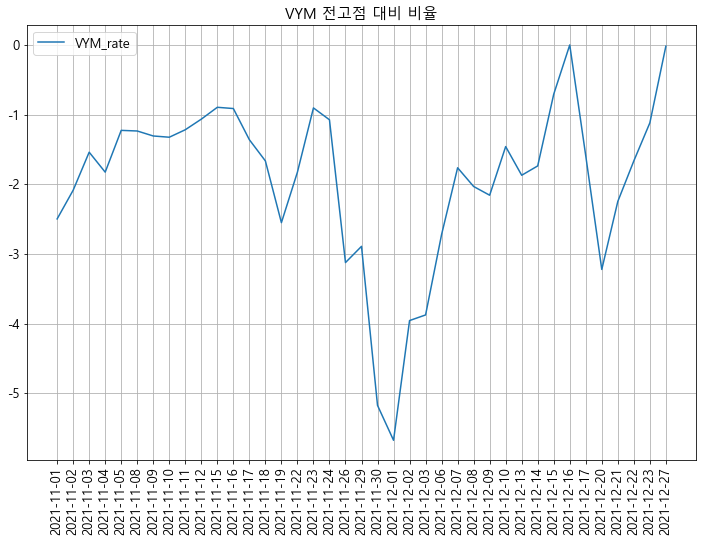

In [24]:
for i in range(8,15):
    plt.figure(figsize=(12,8))
    plt.grid(True)
    plt.xticks(fontsize=13, rotation=90)
    plt.yticks(fontsize=13)
    plt.title(f'{us_stock_df.columns[i-7]} 전고점 대비 비율', fontdict={'size':15})
    plt.plot(us_stock_df['index'].values, us_stock_df.iloc[:,i], label=us_stock_df.columns[i])
    plt.legend(fontsize=13)

#### 국내 주식

In [25]:
for stock_name in kr_stock_df.columns[1:]:
    top_close = kr_stock_df[stock_name].max()
    col_name = stock_name + '_rate'
    kr_stock_df[col_name] = ( (kr_stock_df[stock_name] - top_close) / top_close ) * 100    

In [26]:
kr_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         42 non-null     object 
 1   셀트리온          42 non-null     int64  
 2   삼성전자          42 non-null     int64  
 3   인선이엔티         42 non-null     int64  
 4   스튜디오드래곤       42 non-null     int64  
 5   KT            42 non-null     int64  
 6   셀트리온_rate     42 non-null     float64
 7   삼성전자_rate     42 non-null     float64
 8   인선이엔티_rate    42 non-null     float64
 9   스튜디오드래곤_rate  42 non-null     float64
 10  KT_rate       42 non-null     float64
dtypes: float64(5), int64(5), object(1)
memory usage: 3.7+ KB


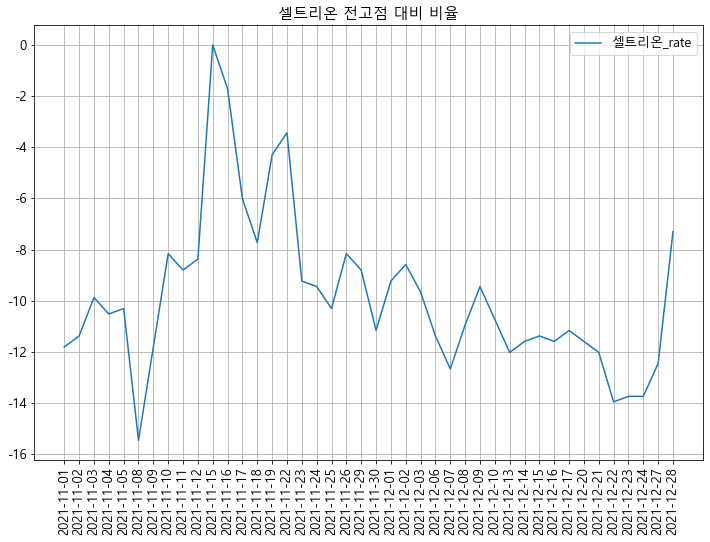

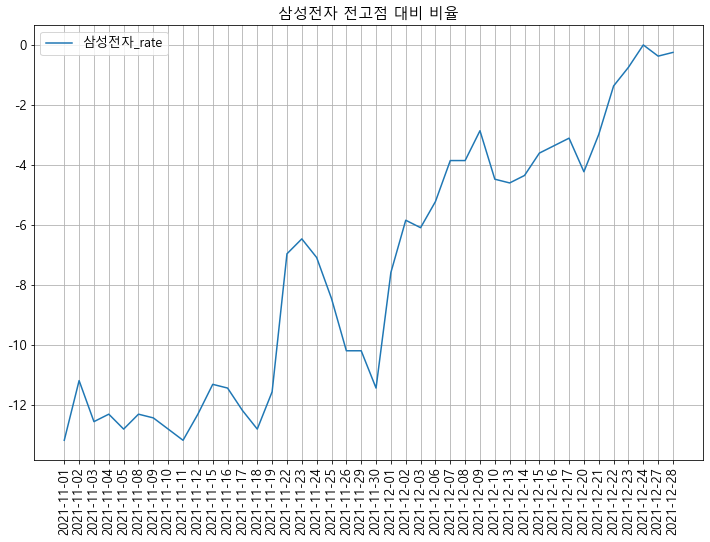

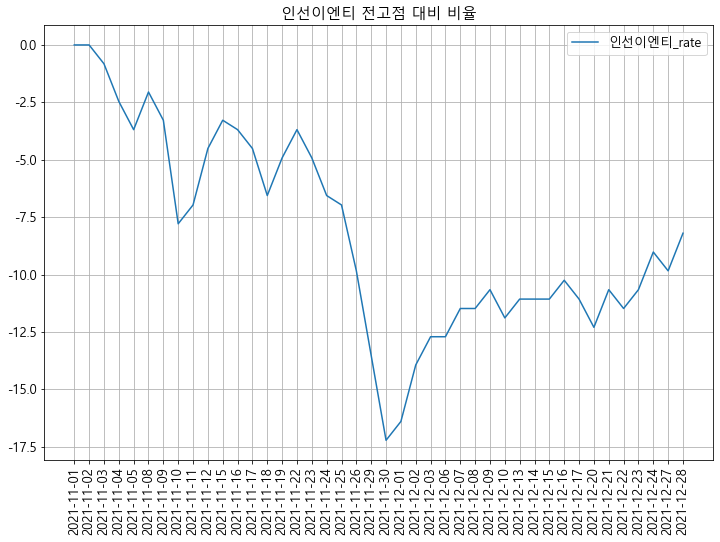

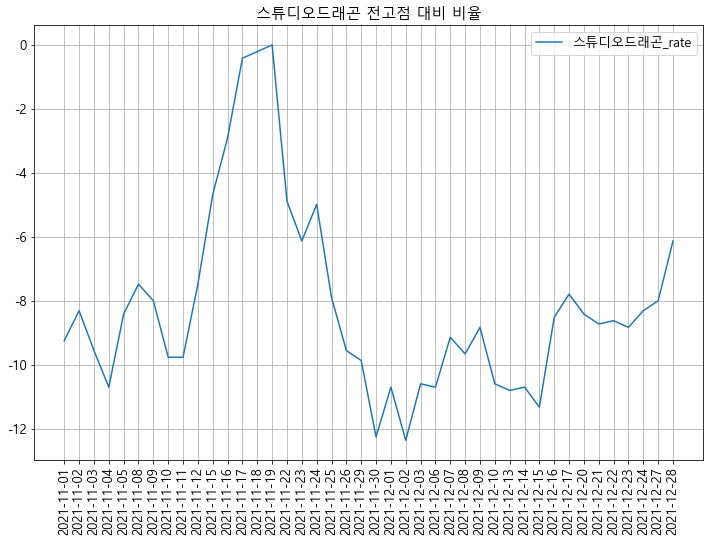

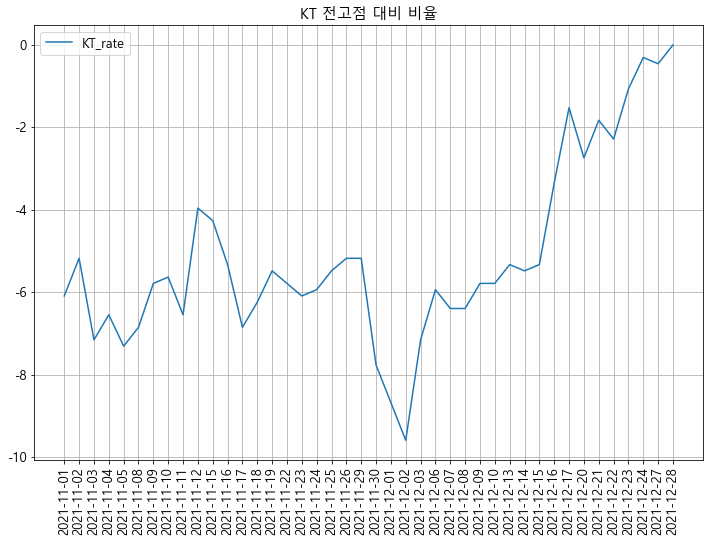

In [27]:
for i in range(6,11):
    plt.figure(figsize=(12,8))
    plt.grid(True)
    plt.xticks(fontsize=13, rotation=90)
    plt.yticks(fontsize=13)
    plt.title(f'{kr_stock_df.columns[i-5]} 전고점 대비 비율', fontdict={'size':15})
    plt.plot(kr_stock_df['index'].values, kr_stock_df.iloc[:,i], label=kr_stock_df.columns[i])
    plt.legend(fontsize=13)

##### 5%이하인경우

In [28]:
us_stock_df[us_stock_df['apple_rate'] <= -5 ][['index','apple_rate']]

,index,apple_rate
0,2021-11-01,-17.395885
1,2021-11-02,-16.808074
2,2021-11-03,-15.992902
3,2021-11-04,-16.286808
4,2021-11-05,-16.109355
5,2021-11-08,-16.575168
6,2021-11-09,-16.369988
7,2021-11-10,-17.972606
8,2021-11-11,-18.000333
9,2021-11-12,-16.824710


## 자산 비율 조정
* 1. 소유한 주식의 비중을 계산한다.
* 2. 시각화 한다.